In [6]:
class FileLoader:
   

    def load(self, path):
        import pandas as pd
        csv = pd.read_csv(path)
        # df = pd.DataFrame(x)
        print('('+ str(len(csv)) + ',' + str(len(csv.columns)) + ')')
        return csv
    


In [53]:
import pandas as pd

fl = FileLoader()
path2 = r"C:\Users\Gabriel\Desktop\Mes documents - Google Drive\DATA\19\day04\athlete_events.csv"
df = fl.load(path2)
print(type(df))

(271116,15)
<class 'pandas.core.frame.DataFrame'>


In [54]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [55]:
df = df[(df.Year >= 1992)&(df.Team == "Greece")]
df = df[["Weight", "Height"]]

df = df.dropna()
df.head(5)

,Weight,Height
177,70.0,178.0
183,77.0,190.0
202,43.0,155.0
1980,103.0,194.0
1981,103.0,194.0


In [56]:
import matplotlib.pyplot as plt

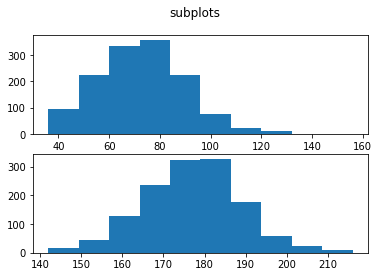

In [57]:
fig, axs = plt.subplots(2)
fig.suptitle('subplots')
axs[0].hist(df["Weight"])
axs[1].hist(df["Height"])
plt.show()

In [58]:
print(type(df.Weight))

<class 'pandas.core.series.Series'>


(array([0.00430586, 0.00663821, 0.00861173, 0.00753526, 0.01507053,
        0.02350285, 0.02583519, 0.01578817, 0.02314402, 0.0227852 ,
        0.01722346, 0.02152932, 0.01237936, 0.01237936, 0.01022643,
        0.00376763, 0.00448528, 0.00179411, 0.        , 0.00251175,
        0.00143529, 0.00017941, 0.00035882, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00017941]),
 array([ 36.        ,  40.13793103,  44.27586207,  48.4137931 ,
         52.55172414,  56.68965517,  60.82758621,  64.96551724,
         69.10344828,  73.24137931,  77.37931034,  81.51724138,
         85.65517241,  89.79310345,  93.93103448,  98.06896552,
        102.20689655, 106.34482759, 110.48275862, 114.62068966,
        118.75862069, 122.89655172, 127.03448276, 131.17241379,
        135.31034483, 139.44827586, 143.5862069 , 147.72413793,
        151.86206897, 156.        ]),
 <a list of 29 Patch objects>)

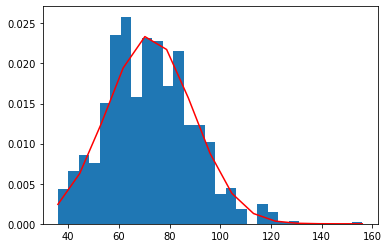

In [73]:
import numpy as np   
from numpy.random import normal 
from scipy.stats import norm 
mean = np.mean(df.Weight)
sigma = np.std(df.Weight)
x_plot = np.linspace(min(df.Weight), max(df.Weight), 15)  
plt.plot(x_plot, norm.pdf(x_plot, mean, sigma), 'r-', label="pdf")
plt.hist(df.Weight, bins='auto',density=True)

(array([3., 2., 0., 4., 4.]),
 array([60. , 64.6, 69.2, 73.8, 78.4, 83. ]),
 <a list of 5 Patch objects>)

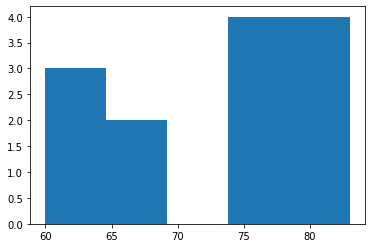

In [51]:
plt.hist(df.Weight, bins='auto')

In [383]:
# set(df.Year.to_list())

In [384]:
# def howManyMedalsByCountry(df, country_name):
df = df[df.Team == "Greece"]
# df =df[df.Medal.notnull()]
list_year = set(df.Year.to_list())
df["CountMedal"] = 1
df = df.groupby(['Year', 'Medal', 'Sport']).CountMedal.agg('mean')
df = df.reset_index()
df = df.groupby(['Year', 'Medal']).CountMedal.agg('count')
#         list_year = list(set(list(zip(*list(df.index)))[0]))
df = df.reset_index()
df.head()

,Year,Medal,CountMedal
0,1896,Bronze,8
1,1896,Gold,6
2,1896,Silver,8
3,1904,Bronze,1
4,1904,Gold,1


In [392]:
# df[(df.Year==1920)&(df.Medal == "Silver") ]

,Year,Medal,CountMedal
12,1920,Silver,1


In [393]:
# for y in list_year:
#     for x in df.Medal[df.Year ==y]:
#         print(y)
#         print(x)
#         print(df[(df.Year==y)&(df.Medal == x) ])

1920
Silver
    Year   Medal  CountMedal
12  1920  Silver           1
1924
Gold
    Year Medal  CountMedal
13  1924  Gold           1
1956
Bronze
    Year   Medal  CountMedal
14  1956  Bronze           1
1968
Bronze
    Year   Medal  CountMedal
15  1968  Bronze           1
1972
Silver
    Year   Medal  CountMedal
16  1972  Silver           2
1980
Bronze
    Year   Medal  CountMedal
17  1980  Bronze           2
1980
Gold
    Year Medal  CountMedal
18  1980  Gold           1
1984
Bronze
    Year   Medal  CountMedal
19  1984  Bronze           1
1984
Silver
    Year   Medal  CountMedal
20  1984  Silver           1
1988
Bronze
    Year   Medal  CountMedal
21  1988  Bronze           1
1992
Gold
    Year Medal  CountMedal
22  1992  Gold           2
1996
Gold
    Year Medal  CountMedal
23  1996  Gold           3
1996
Silver
    Year   Medal  CountMedal
24  1996  Silver           2
2000
Bronze
    Year   Medal  CountMedal
25  2000  Bronze           3
2000
Gold
    Year Medal  CountMedal
26  200

In [396]:

# list_medal = list(set(list(zip(*list(df.index)))[1]))
# dct = {y: {m: df[y][m] for m in list_medal} for y in list_year}
dct = {y: {m: df[(df.Year==y)&(df.Medal == m)][CountMedal] for m in [x for x in df.Medal[df.Year ==y]]} for y in list_year}
print(dct)

NameError: name 'CountMedal' is not defined

In [355]:
howManyMedalsByCountry(df, 'Greece')

C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


KeyError: 1920

In [313]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [314]:
# df =df[df.Medal.notnull()]
df = df[df.Team == "Greece"]

In [318]:
df["CountMedal"] = 1
df

C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,CountMedal
177,75,Giorgos Abalof,M,22.0,178.0,70.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",NaN,1
183,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,NaN,1
202,95,Georgia Abatzidou,F,35.0,155.0,43.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Marathon,NaN,1
1410,793,Panagiotis Adamidis,M,18.0,NaN,NaN,Greece,GRE,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Backstroke,NaN,1
1411,793,Panagiotis Adamidis,M,18.0,NaN,NaN,Greece,GRE,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Backstroke,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270473,135285,Khristos Zoumis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,NaN,1
270474,135286,Kharalambos Zouras,M,23.0,NaN,NaN,Greece,GRE,1908 Summer,1908,Summer,London,Athletics,Athletics Men's Javelin Throw,NaN,1
270475,135286,Kharalambos Zouras,M,23.0,NaN,NaN,Greece,GRE,1908 Summer,1908,Summer,London,Athletics,"Athletics Men's Javelin Throw, Freestyle",NaN,1
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,1


In [290]:
df = df.groupby(['Year', 'Medal', 'Sport' ]).CountMedal.agg('mean')

In [291]:
df

Year  Medal   Sport     
1896  Bronze  Athletics     1
              Fencing       1
              Gymnastics    1
              Shooting      1
              Swimming      1
                           ..
2016  Bronze  Shooting      1
      Gold    Athletics     1
              Gymnastics    1
              Shooting      1
      Silver  Swimming      1
Name: CountMedal, Length: 96, dtype: int64

In [292]:
df = df.reset_index()
df = df.groupby(['Year', 'Medal']).CountMedal.agg('count')
df.head(10)

Year  Medal 
1896  Bronze    8
      Gold      6
      Silver    8
1904  Bronze    1
      Gold      1
1906  Bronze    5
      Gold      6
      Silver    4
1908  Bronze    1
      Silver    1
Name: CountMedal, dtype: int64

In [293]:
df = df.reset_index()
df.head(10)

,Year,Medal,CountMedal
0,1896,Bronze,8
1,1896,Gold,6
2,1896,Silver,8
3,1904,Bronze,1
4,1904,Gold,1
5,1906,Bronze,5
6,1906,Gold,6
7,1906,Silver,4
8,1908,Bronze,1
9,1908,Silver,1


In [305]:
list = [x for x in df.Medal[df.Year ==1896]]
list

['Bronze', 'Gold', 'Silver']

In [ ]:
dct = {df.index[0][0]:{df.index[0][1]:}}

In [281]:
df.index[1][0]

1896

In [269]:
df.index

MultiIndex([(1896, 'Bronze'),
            (1896,   'Gold'),
            (1896, 'Silver'),
            (1904, 'Bronze'),
            (1904,   'Gold'),
            (1906, 'Bronze'),
            (1906,   'Gold'),
            (1906, 'Silver'),
            (1908, 'Bronze'),
            (1908, 'Silver'),
            (1912, 'Bronze'),
            (1912,   'Gold'),
            (1920, 'Silver'),
            (1924,   'Gold'),
            (1956, 'Bronze'),
            (1968, 'Bronze'),
            (1972, 'Silver'),
            (1980, 'Bronze'),
            (1980,   'Gold'),
            (1984, 'Bronze'),
            (1984, 'Silver'),
            (1988, 'Bronze'),
            (1992,   'Gold'),
            (1996,   'Gold'),
            (1996, 'Silver'),
            (2000, 'Bronze'),
            (2000,   'Gold'),
            (2000, 'Silver'),
            (2004, 'Bronze'),
            (2004,   'Gold'),
            (2004, 'Silver'),
            (2008, 'Bronze'),
            (2008, 'Silver'),
          